# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
#from google.colab import drive
#rive.mount('/content/drive')

In [ ]:
# Change the working directory to your project folder.
#import os
#drive_path = '/content/drive/MyDrive/Colab Notebooks/'
#project_folder = 'Project/'
#os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Open a dataset from your project folder in Google Drive
gdp = pd.read_csv('https://tayweid.github.io/econ-0150/projects/riley_widdop/data/gdp-per-capita-worldbank.csv')
gdp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2000,1617.8264,NaN
1,Afghanistan,AFG,2001,1454.1108,NaN
2,Afghanistan,AFG,2002,1774.3087,NaN
3,Afghanistan,AFG,2003,1815.9282,NaN
4,Afghanistan,AFG,2004,1776.9182,NaN


In [3]:
life = pd.read_csv('https://tayweid.github.io/econ-0150/projects/riley_widdop/data/life-expectancy.csv')
life.head()


,Entity,Code,Year,Period life expectancy at birth
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [4]:
# Data operations here
life = life[life['Year']==2023]
gdp = gdp[gdp['Year']==2023]
gdp = gdp.dropna()
gdp = gdp.rename(columns={'Entity': 'Country','Code': 'Code','Year': 'Year', 'GDP per capita, PPP (constant 2021 international $)' : 'GDP_per_capita', 'World regions according to OWID' : 'Region'})
life = life.rename(columns={'Entity': 'Country', 'Code':'Code', 'Year':'Year', 'Period life expectancy at birth':'LifeExpectancy'})
life_c = set(life['Country'].unique())
gdp_c = set(gdp['Country'].unique())
same_c = life_c.intersection(gdp_c)
life = life[life['Country'].isin(same_c)]
gdp = gdp[gdp['Country'].isin(same_c)]
gdp['GDP_per_capita_log'] = np.log(gdp['GDP_per_capita'])

In [5]:
# Save your dataset after you've worked on it
data = pd.merge(life, gdp, on=['Country', 'Year', 'Code'], how='inner')
data2 = data[data['Region']=='North America']
data.head()

,Country,Code,Year,LifeExpectancy,GDP_per_capita,Region,GDP_per_capita_log
0,Afghanistan,AFG,2023,66.0346,1983.8126,Asia,7.592776
1,Albania,ALB,2023,79.6019,17991.0160,Europe,9.797628
2,Algeria,DZA,2023,76.2610,15159.3240,Africa,9.626371
3,Andorra,AND,2023,84.0406,64631.2970,Europe,11.076454
4,Angola,AGO,2023,64.6170,7250.4030,Africa,8.888812


## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here

Text(0.5, 0, 'GDP per capita')

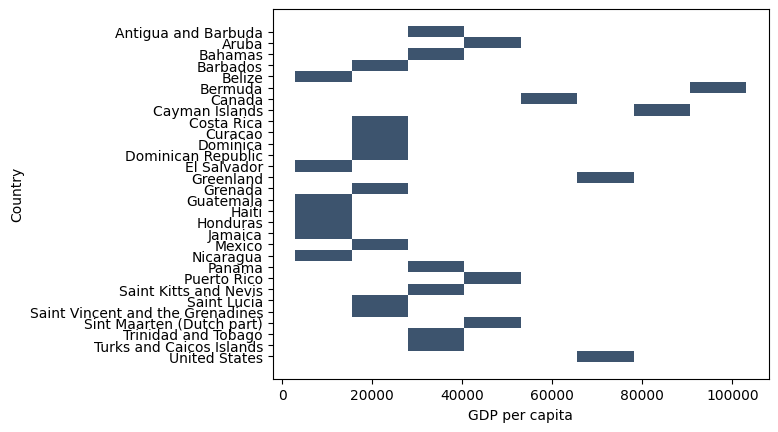

In [6]:
sns.histplot(data2, y= 'Country', x='GDP_per_capita')
plt.xlabel('GDP per capita')

Text(0.5, 0, 'Life Expectancy')

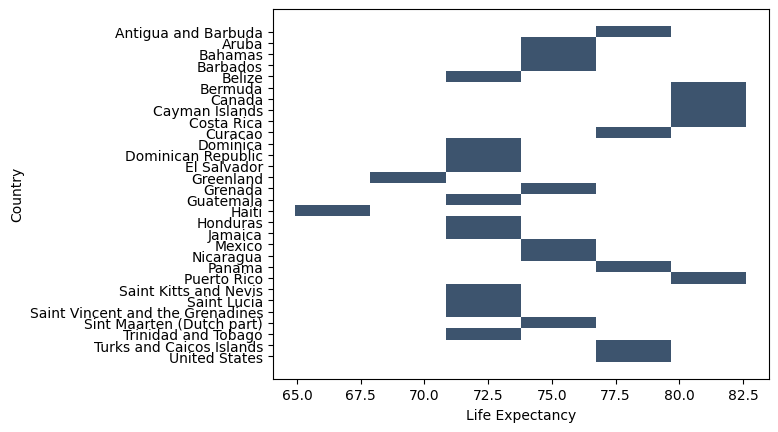

In [7]:
sns.histplot(data2, y= 'Country', x='LifeExpectancy')
plt.xlabel('Life Expectancy')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

Our null hypothesis: GDP per capita has no effect on life expectancy

Our statistical model: simple linear regression

Text(0, 0.5, 'Life Expectancy')

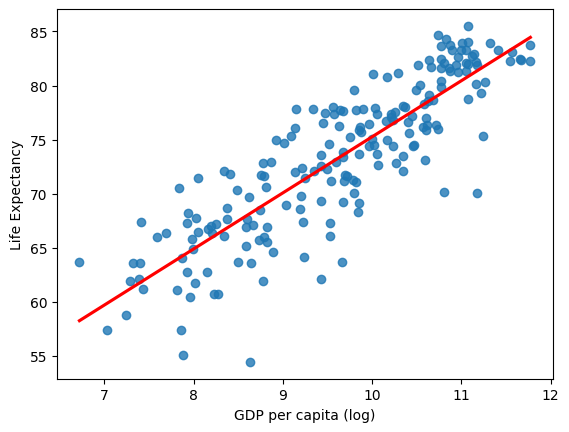

In [8]:
# Build and run your model here
sns.regplot(x=data['GDP_per_capita_log'], y=data['LifeExpectancy'], ci=None, line_kws={'color': 'red'})
plt.xlabel('GDP per capita (log)')
plt.ylabel('Life Expectancy')

In [13]:
model = smf.ols('LifeExpectancy ~ GDP_per_capita', data=data).fit()
print(model.summary().tables[1])

                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         68.1353      0.480    142.045      0.000      67.189      69.081
GDP_per_capita     0.0002   1.27e-05     15.430      0.000       0.000       0.000
